In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice

In [2]:
# SPICE test
spice.tkvrsn('TOOLKIT')

'CSPICE_N0067'

Import SPICE user Lib

In [3]:
import sys

# import SPICE user lib
sys.path.append('../lib/')
import clipper_spice_lib as clipper_lib
import juice_spice_lib as juice_lib

Load SPICE kernels

In [4]:
# load SPICE ketnels
spice_dir = 'C:/share/Linux/doc/spice/clipper/kernels/'
clipper_lib.spice_ini(spice_dir)

S/C orbit near Earth

In [5]:
# set date/time
utctim = '2024-10-11T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*24*30  # number of data
dt = 60   # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice

x, y, z, r, lat, lon = juice_lib.get_pos_xref(
    et, ref='IAU_EARTH', tar='EUROPA CLIPPER', org='EARTH', x_ref='SUN', corr='LT+S')



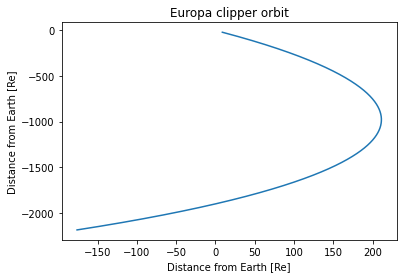

In [6]:
# plot
re = 6400.0  # km
plt.plot(x/re, y/re)
plt.title('Europa clipper orbit')
plt.xlabel('Distance from Earth [Re]')
plt.ylabel('Distance from Earth [Re]')
plt.show()


S/C orbit from Earth to Jupiter

In [7]:
# set date/time
utctim = '2024-10-11T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 365*8 # number of data
dt = 60*60*24   # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos_xref(
    et, ref='IAU_SUN', tar='EUROPA CLIPPER', org='SUN', x_ref='JUPITER', corr='LT+S')


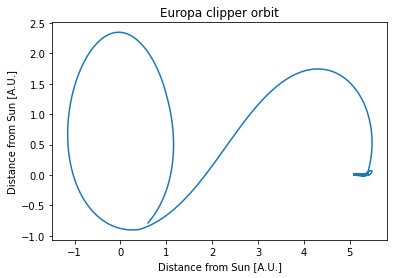

In [8]:
from astropy.constants import au

# plot
au_km=au*1e-3
plt.plot(x/au_km, y/au_km)
plt.title('Europa clipper orbit')
plt.xlabel('Distance from Sun [A.U.]')
plt.ylabel('Distance from Sun [A.U.]')
plt.show()


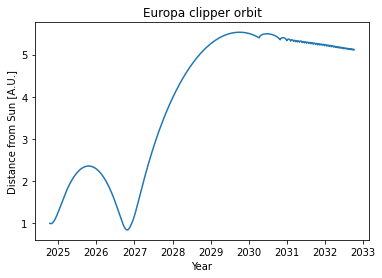

In [9]:
# plot
td = spice.et2datetime(et)
plt.plot(td, r/au_km)
plt.title('Europa clipper orbit')
plt.xlabel('Year')
plt.ylabel('Distance from Sun [A.U.]')
plt.show()

S/C orbit around Jupiter (after JOI)

In [10]:
# set date/time
utctim = '2030-01-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 24*365*4  # number of data
dt = 60*60     # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos_xref(
    et, ref='IAU_JUPITER', tar='EUROPA CLIPPER', org='JUPITER', x_ref='SUN', corr='LT+S')


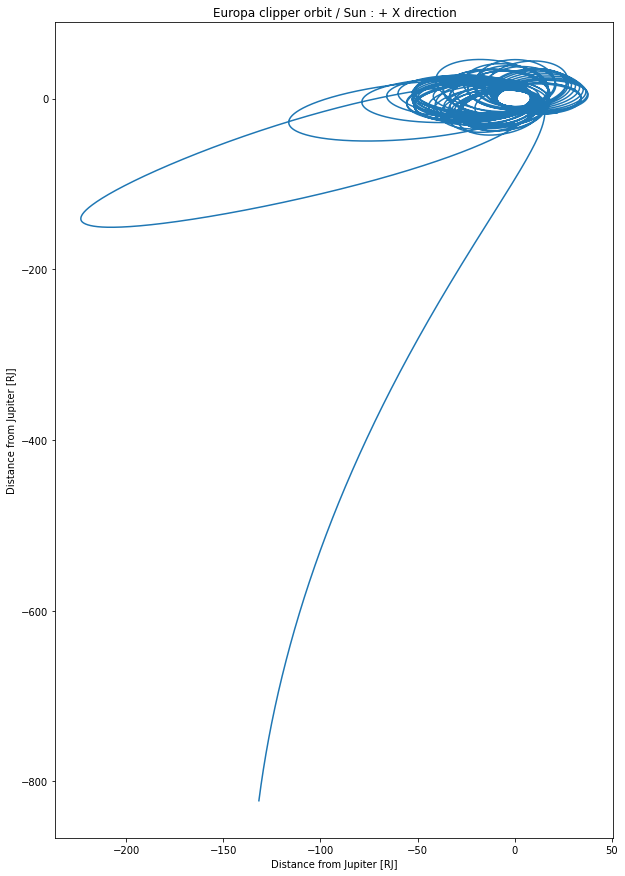

In [11]:
# plot
rj = 71400.0  # [km]
plt.figure(figsize=(10, 15))
plt.plot(x/rj, y/rj)
plt.title('Europa clipper orbit / Sun : + X direction')
plt.xlabel('Distance from Jupiter [RJ]')
plt.ylabel('Distance from Jupiter [RJ]')
plt.show()

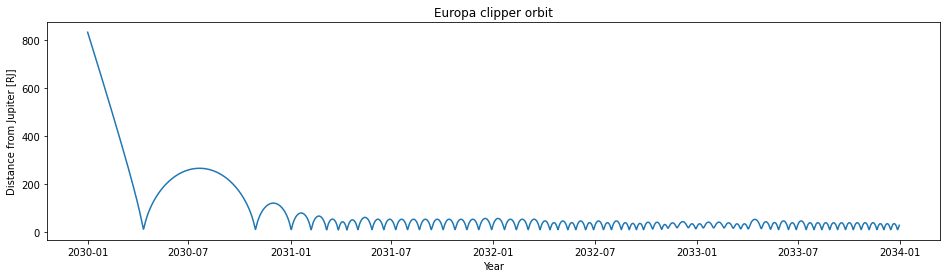

In [12]:
# plot
td = spice.et2datetime(et)
rj = 71400.0  # [km]
plt.figure(figsize=(16, 4))
plt.plot(td, r/rj)
plt.title('Europa clipper orbit')
plt.xlabel('Year')
plt.ylabel('Distance from Jupiter [RJ]')
plt.show()

In [13]:
# set date/time
utctim = '2031-01-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 24*365*3.6  # number of data
dt = 60*60    # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos_xref(
    et, ref='IAU_JUPITER', tar='EUROPA CLIPPER', org='JUPITER', x_ref='SUN', corr='LT+S')

Text(0, 0.5, 'Z distance from Jupiter [RJ]')

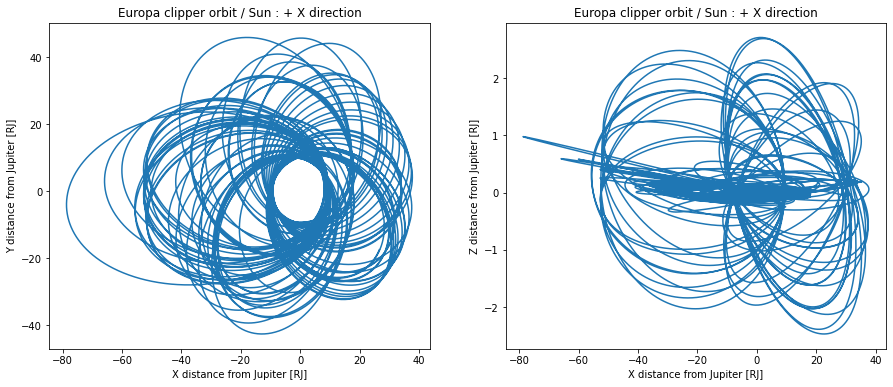

In [14]:
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(15.0, 6.0))

# plot
rj = 71400.0  # [km]
ax1.plot(x/rj, y/rj)
ax1.set_title('Europa clipper orbit / Sun : + X direction')
ax1.set_xlabel('X distance from Jupiter [RJ]')
ax1.set_ylabel('Y distance from Jupiter [RJ]')

ax2.plot(x/rj, z/rj)
ax2.set_title('Europa clipper orbit / Sun : + X direction')
ax2.set_xlabel('X distance from Jupiter [RJ]')
ax2.set_ylabel('Z distance from Jupiter [RJ]')


S/C orbit around Jupiter & Europa

In [15]:
# set date/time
utctim = '2031-01-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 24*365*3.6  # number of data
dt = 60*60     # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(et, ref='IAU_EUROPA', tar='EUROPA CLIPPER', org='EUROPA')


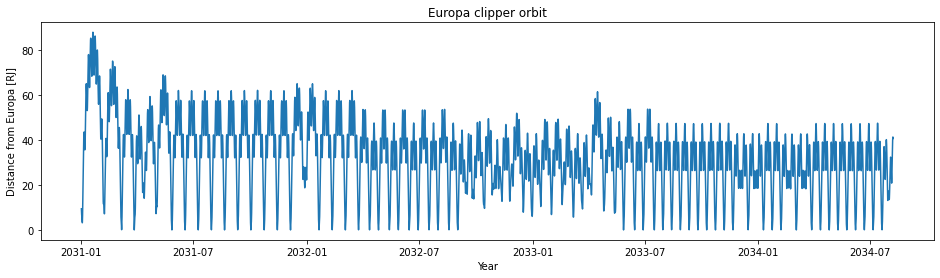

In [16]:
# plot
rj = 71400.0  # [km]

td = spice.et2datetime(et)
plt.figure(figsize=(16, 4))
plt.plot(td, r/rj)
plt.title('Europa clipper orbit')
plt.xlabel('Year')
plt.ylabel('Distance from Europa [RJ]')
plt.show()


S/C orbit around Europa

In [17]:
# set date/time
utctim = '2031-01-01T00:00:00'    # start date/time
et_ex = spice.str2et(utctim)      # seconds
nd = 60*24*365*3.6  # number of data
dt = 60    # time step [second]
et = et_ex + dt * np.arange(0, nd)

# calculate target position with spice
x, y, z, r, lat, lon = juice_lib.get_pos(
    et, 'IAU_EUROPA', 'EUROPA CLIPPER', 'EUROPA')

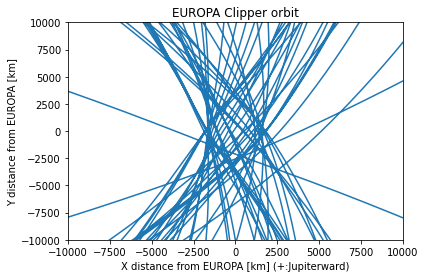

In [18]:
# plot
plt.plot(x, y)
prange = 10000.0
plt.xlim(-prange, prange)
plt.ylim(-prange, prange)
plt.title('EUROPA Clipper orbit')
plt.xlabel('X distance from EUROPA [km] (+:Jupiterward)')
plt.ylabel('Y distance from EUROPA [km]')

plt.show()

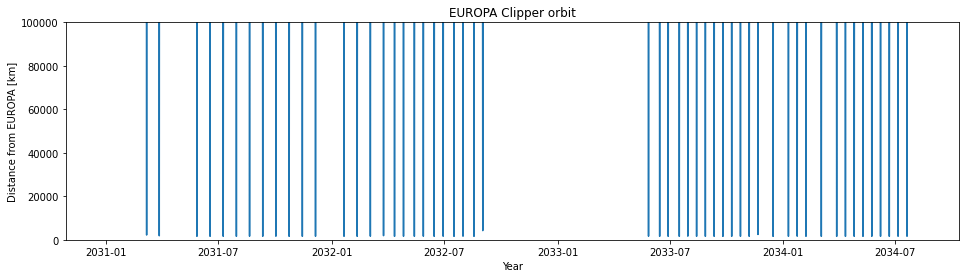

In [19]:
# plot
td = spice.et2datetime(et)
plt.figure(figsize=(16, 4))
plt.plot(td, r)
plt.ylim(0.0, 100000.0)
plt.title('EUROPA Clipper orbit')
plt.xlabel('Year')
plt.ylabel('Distance from EUROPA [km]')
plt.show()

Search closest approach

0 2031-03-07 02:39:59.998448+00:00 2194.530751004845
1 2031-03-27 14:02:59.998269+00:00 1841.4049088197771
2 2031-05-27 13:02:59.998892+00:00 1613.050588544546
3 2031-06-17 20:06:59.999419+00:00 1612.7248579505351
4 2031-07-09 03:13:00.000008+00:00 1615.9756278481436
5 2031-07-30 10:40:00.000585+00:00 1597.9900160798682
6 2031-08-20 18:09:00.001077+00:00 1651.7217612449515
7 2031-09-11 01:37:00.001420+00:00 1610.8399652364205
8 2031-10-02 09:07:00.001565+00:00 1656.7659851435035
9 2031-10-23 21:46:00.001490+00:00 1585.8251338304476
10 2031-11-14 05:17:00.001201+00:00 1597.9332342031807
11 2031-12-05 12:57:00.000735+00:00 1628.478467291608
12 2032-01-20 16:45:59.999443+00:00 1616.0164857843897
13 2032-02-11 00:21:59.998897+00:00 1595.9953621860159
14 2032-03-03 07:49:59.998492+00:00 1662.9260884362545
15 2032-03-24 15:38:59.998279+00:00 1895.7582326239378
16 2032-04-11 10:41:59.998269+00:00 1590.3772093850057
17 2032-04-25 23:53:59.998375+00:00 1636.1121041583638
18 2032-05-13 13:34:59.

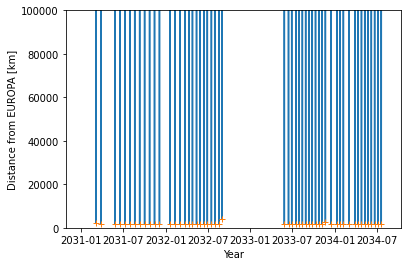

In [27]:
ca_time = []
ca_dist = []

for i in range(1,int(nd)-2):
    if r[i] < r[i-1] and r[i] < r[i+1] and r[i] < 20000.0:
        ca_time.append(td[i])
        ca_dist.append(r[i])

n = len(ca_time)
for i in range(n):
    print(i,ca_time[i], ca_dist[i])

plt.plot(td, r)
plt.plot(ca_time, ca_dist, '+')
plt.ylim(0.0, 100000.0)
plt.xlabel('Year')
plt.ylabel('Distance from EUROPA [km]')
plt.show()

Apparent diameter of Europa seen from Europa Clipper

In [ ]:
re = 1560.8  # [km]
appdia = 2.0*np.arctan(re/r) / np.pi * 180.0  # degree

# Spatial resolution of UVIS onboard Europa clipper : 0.15 deg/pixel
pltscl=0.15

n1 = sum(x > pltscl*20 for x in appdia)
n2 = sum(x > pltscl*10 for x in appdia)
n3 = sum(x > pltscl*4 for x in appdia)
print("Total time [day]: ", float(nd)/60.0/24.0)
print("Time when spatial resolution < 0.1Re [day]: ", float(n1)/60.0/24.0)
print("Time when spatial resolution < 0.2Re [day]: ", float(n2)/60.0/24.0)
print("Time when spatial resolution < 0.5Re [day]: ", float(n3)/60.0/24.0)

# plot
plt.figure(figsize=(16, 4))
plt.plot(td, appdia, label='Europa [deg]')
xx = [td[0], td[len(td)-1]]
yy1 = [pltscl*20, pltscl*20]
yy2 = [pltscl*10, pltscl*10]
yy3 = [pltscl*4, pltscl*4]
plt.plot(xx, yy1, label='20 div')
plt.plot(xx, yy2, label='10 div')
plt.plot(xx, yy3, label='4 div')
plt.title('Apparent diameter of Europa seen from Europa Clipper')
plt.xlabel('Year')
plt.ylabel('degree')
plt.yscale('log')
plt.legend()
plt.show()


In [ ]:
utctim1 = '2031-07-07T00:00:00'
utctim2 = '2031-07-11T00:00:00'
td1 = spice.et2datetime(spice.str2et(utctim1))
td2 = spice.et2datetime(spice.str2et(utctim2))

# plot
plt.figure(figsize=(16, 4))
plt.plot(td, appdia, label='Europa [deg]')
plt.xlim([td1, td2])
xx = [td1, td2]
plt.plot(xx, yy1, label='20 div')
plt.plot(xx, yy2, label='10 div')
plt.plot(xx, yy3, label='4 div')
plt.title('Apparent diameter of Europa seen from Europa Clipper')
plt.xlabel('Year')
plt.ylabel('degree')
plt.yscale('log')
plt.legend()
plt.show()


In [ ]:
re = 1560.8  # [km]
idx = np.where(r > re*2)
xx=x
xx[idx] = np.nan
yy=y
yy[idx] = np.nan
zz=z
zz[idx] = np.nan
rr=r
rr[idx] = np.nan
llat=lat
llat[idx] = np.nan
llon=lon
llon[idx] = np.nan

range = 2.5

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18.0, 6.0), sharex=True, sharey=True)

#ax1.scatter(x/re, y/re, s=1.0)
ax1.plot(xx/re, yy/re)
ax1.set_xlim(-range, range)
ax1.set_ylim(-range, range)
ax1.set_title('EUROPA Clipper orbit')
ax1.set_xlabel('X distance from EUROPA [Re]')
ax1.set_ylabel('Y distance from EUROPA [Re]')

#ax2.scatter(y/re, z/re, s=1.0)
ax2.plot(yy/re, zz/re)
ax2.set_xlim(-range, range)
ax2.set_ylim(-range, range)
ax2.set_title('EUROPA Clipper orbit')
ax2.set_xlabel('Y distance from EUROPA [Re]')
ax2.set_ylabel('Z distance from EUROPA [Re]')

ax3.plot(xx/re, zz/re)
ax3.set_xlim(-range, range)
ax3.set_ylim(-range, range)
ax3.set_title('EUROPA Clipper orbit')
ax3.set_xlabel('X distance from EUROPA [Re]')
ax3.set_ylabel('Z distance from EUROPA [Re]')


In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(llon*180.0/np.pi, llat*180.0/np.pi,s=1.0)
plt.title('EUROPA Clipper orbit (h<1Reuropa)')
plt.xlabel('Longitude [deg]')
plt.ylabel('Latitude [deg]')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12.0, 8.0))

ax1.plot(td, llat*180.0/np.pi)
ax1.set_title('EUROPA Clipper orbit')
ax1.set_xlabel('Date')
ax1.set_ylabel('Latitude [deg]')

ax2.plot(td, llon*180.0/np.pi)
ax2.set_xlabel('Date')
ax2.set_ylabel('Longitude [deg]')
